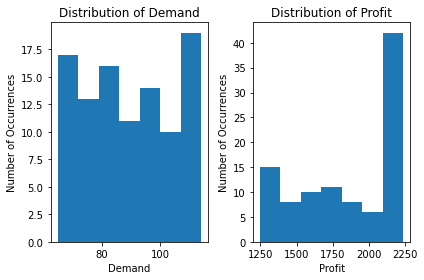

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show

%load_ext lab_black
%matplotlib inline

# model parameters:

cost = 17.5
# cost per unit
f_price = 39.9
# full price
mark_down = 11.5
# mark down price
min_demand = 65
# minimum demand
max_demand = 115
# maximum demand
inventory = 100
# minimum inventory

np.random.seed(100)
n_simulations = 1
# number of simulations
n_reps = 100
# number of repetitinos per simulation
ran_demand = np.random.randint(min_demand, max_demand, n_reps)
# create the demand matrix with random integer between  min demand, max demand, for "n_reps" number in matrix
bins_n = 7
# number of bins wanted in histogram

# defining calculation functions
def revenue_f(x):
    return np.minimum(x, inventory) * f_price


# a function returning revenue for full price
def left_over(x):
    return np.maximum(0, inventory - x)


# function returning current left-over inventory
def revenue_s(x):
    return left_over(x) * mark_down


# function returning left-over sales in mark-down price
def avg_sales(x):
    return np.average(x)


# function returning the average demand created by ran_demand. Assuming sales = demand in this simulation
def avg_profit(x):
    return np.average(revenue_f(x) + revenue_s(x) - inventory * cost)


# function returning the average profit


# plotting:

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].hist(list(map(avg_sales, ran_demand)), bins=bins_n)
axes[0].set(
    title="Distribution of Demand", ylabel="Number of Occurrences", xlabel="Demand"
)
# plot the static distribution of demand
axes[1].hist(list(map(avg_profit, ran_demand)), bins=bins_n)
axes[1].set(
    title="Distribution of Profit", ylabel="Number of Occurrences", xlabel="Profit"
)
plt.tight_layout()
# plot the static distribution of profit

In [2]:
# plot with bokeh
from bokeh.io import show

from bokeh.io import output_file, output_notebook

# from bokeh.io import output_file
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.models import HoverTool

output_notebook()

hist1, edges1 = np.histogram(
    list(map(avg_sales, ran_demand)), density=False, bins=bins_n
)
# prepare sales histogram data


s1 = figure(
    tools=[
        HoverTool(mode="vline", tooltips=[("N", "@top"), ("Demand", "$x{0}")]),
        # enables hover with vline mode
        "pan,box_zoom,wheel_zoom,zoom_in,zoom_out,reset,save",
        # tools to enable on plot
    ],
    title="Interactive Distribution of Demand Plot",
    x_axis_label="Demand",
    y_axis_label="Number of Occurrences",
)

hist2, edges2 = np.histogram(
    list(map(avg_profit, ran_demand)), density=False, bins=bins_n
)
# prepare profit histogram data
s2 = figure(
    tools=[
        HoverTool(mode="vline", tooltips=[("N", "@top"), ("Profit", "$x{0}")]),
        # enable hover with vline
        "pan,box_zoom,wheel_zoom,zoom_in,zoom_out,reset,save",
        # enable tools
    ],
    title="Interactive Distribution of Profit Plot",
    x_axis_label="Profit",
    y_axis_label="Number of Occurrences",
)
# set profit plot properties

s1.quad(top=hist1, bottom=0, left=edges1[:-1], right=edges1[1:], line_color="white")
# plot demand histogram
s2.quad(top=hist2, bottom=0, left=edges2[:-1], right=edges2[1:], line_color="white")
# plot profit histogram
grid = gridplot([s1, s2], ncols=2)
# use gridplot to show plots in horizontal layout
show(grid)

# show in bokeh

Loading BokehJS ...